Завдання 1

кількість вузлів: 5 , кількість ребер: 11
[('Singapore', 6), ('San Francisco', 5), ('Tokyo', 4), ('Riga', 3), ('Copenhagen', 4)]


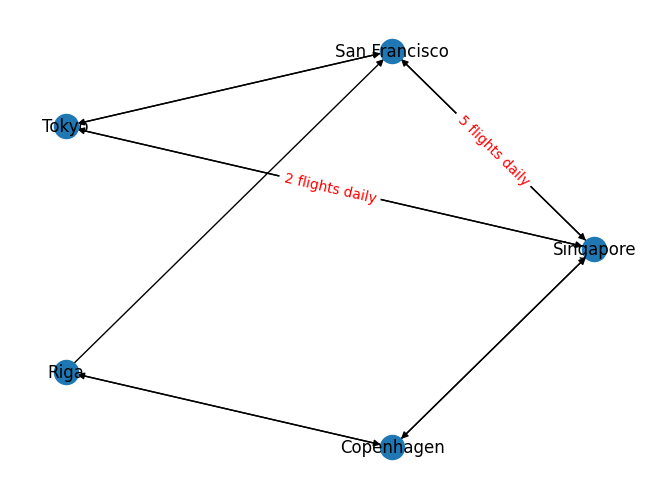

In [58]:
import networkx as nx

#---directed graph---
G = nx.DiGraph(directed=True)

# add nodes
G.add_node('Singapore')
G.add_node('San Francisco')
G.add_node('Tokyo')
G.add_nodes_from(['Riga', 'Copenhagen'])

# add edges
G.add_edge('Singapore','San Francisco', weight=13574)
G.add_edge('San Francisco','Tokyo', weight=8269)
G.add_edge('Riga','Copenhagen', weight=868)
G.add_edge('Copenhagen','Singapore', weight = 9956)
G.add_edge('Singapore','Tokyo', weight = 5308)
G.add_edge('Riga','San Francisco', weight=9016)
G.add_edge('San Francisco','Singapore', weight=13574)
G.add_edge('Copenhagen','Riga', weight = 868)
G.add_edge('Singapore', 'Copenhagen', weight = 9956)
G.add_edge('Tokyo', 'Singapore', weight = 5308)
G.add_edge('Tokyo', 'San Francisco', weight=8269)

# set layout
pos = nx.circular_layout(G)

# draw graph
nx.draw(G, pos, with_labels = True)

# draw edge labels
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        ("Singapore","Tokyo"): '2 flights daily',
        ("San Francisco","Singapore"): '5 flights daily',
    },
    font_color='red'
)


num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
#is_connected = nx.is_connected(G)
print('кількість вузлів:', num_nodes, ', кількість ребер:', num_edges)
print(G.degree)



Завдання 2

In [44]:
# алгоритм DFS
def dfs_recursive(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end=' ')  # Відвідуємо вершину
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)
    return visited

dfs_recursive(G, 'Tokyo')

Tokyo Singapore San Francisco Copenhagen Riga 

{'Copenhagen', 'Riga', 'San Francisco', 'Singapore', 'Tokyo'}

In [45]:
from collections import deque

def bfs_iterative(graph, start):
    # Ініціалізація порожньої множини для зберігання відвіданих вершин
    visited = set()
    # Ініціалізація черги з початковою вершиною
    queue = deque([start])

    while queue:  # Поки черга не порожня, продовжуємо обхід
        # Вилучаємо першу вершину з черги
        vertex = queue.popleft()
        # Перевіряємо, чи була вершина відвідана раніше
        if vertex not in visited:
            # Якщо не була відвідана, друкуємо її
            print(vertex, end=" ")
            # Додаємо вершину до множини відвіданих вершин
            visited.add(vertex)
            # Додаємо всіх невідвіданих сусідів вершини до кінця черги
            # Операція різниці множин вилучає вже відвідані вершини зі списку сусідів
            queue.extend(set(graph[vertex]) - visited)
    # Повертаємо множину відвіданих вершин після завершення обходу
    return visited


# Запуск алгоритму BFS
bfs_iterative(G, 'Tokyo')

Tokyo San Francisco Singapore Copenhagen Riga 

{'Copenhagen', 'Riga', 'San Francisco', 'Singapore', 'Tokyo'}

Алгоритм DFS обходить вузли наступним чином
(Tokyo -> Singapore -> San Francisco) дійшов до низу, нова вітка (Copenhagen -> Riga) проходячи вглиб по вузлах.
Алгоритм BFS обходить вузли так:
(Tokyo -> San Francisco) до нового сусіда(-> Singapore), на рівень нижче (Copenhagen) (Riga)
Відвідані вузли, в обох алгоритмах збігаються.

Завдання 3

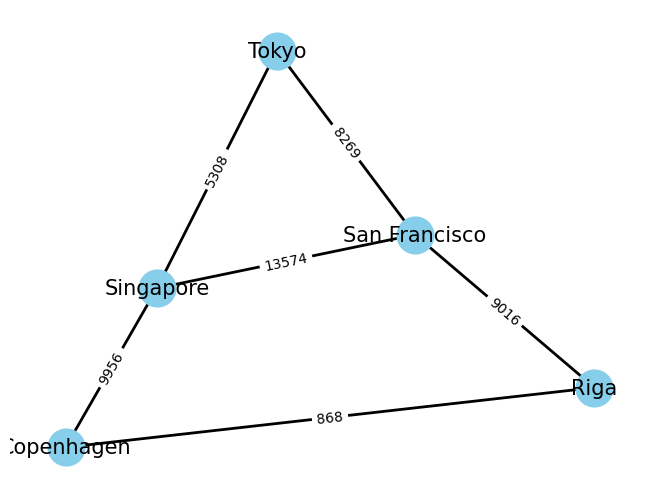

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()

# Додавання міст і доріг
G.add_edge('Singapore','San Francisco', weight=13574)
G.add_edge('San Francisco','Tokyo', weight=8269)
G.add_edge('Riga','Copenhagen', weight=868)
G.add_edge('Copenhagen','Singapore', weight = 9956)
G.add_edge('Singapore','Tokyo', weight = 5308)
G.add_edge('Riga','San Francisco', weight=9016)
G.add_edge('San Francisco','Singapore', weight=13574)
G.add_edge('Copenhagen','Riga', weight = 868)
G.add_edge('Singapore', 'Copenhagen', weight = 9956)
G.add_edge('Tokyo', 'Singapore', weight = 5308)
G.add_edge('Tokyo', 'San Francisco', weight=8269)

# Візуалізація графа
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=15, width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [61]:
def dijkstra(graph, start):
    # Ініціалізація відстаней та множини невідвіданих вершин
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        # Знаходження вершини з найменшою відстанню серед невідвіданих
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        # Якщо поточна відстань є нескінченністю, то ми завершили роботу
        if distances[current_vertex] == float('infinity'):
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight

            # Якщо нова відстань коротша, то оновлюємо найкоротший шлях
            if distance < distances[neighbor]:
                distances[neighbor] = distance

        # Видаляємо поточну вершину з множини невідвіданих
        unvisited.remove(current_vertex)

    return distances

# Приклад графа у вигляді словника

graph = {
    'Singapore': {'San Francisco': 13574, 'Tokyo': 5308, 'Copenhagen': 9956},
    'San Francisco': {'Tokyo': 8269, 'Singapore': 13574},
    'Tokyo': {'Singapore': 5308, 'San Francisco': 8269},
    'Copenhagen': {'Singapore': 9956, 'Riga': 869},
    'Riga': {'Copenhagen': 869, 'San Francisco': 9016}
}

# Виклик функції для вершини A
print(dijkstra(graph, 'Tokyo'))


{'Singapore': 5308, 'San Francisco': 8269, 'Tokyo': 0, 'Copenhagen': 15264, 'Riga': 16133}
